In [ ]:
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
df = pd.read_csv('../data/display_data.csv')

In [25]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back to string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the content column
df['content'] = df['content'].apply(preprocess_text)

# Extract the content column as a list of documents
documents = df['content'].tolist()

# Initialize BERTopic with a maximum of 15 topics
topic_model = BERTopic(nr_topics=15)

# Fit the model to your documents
topics, probabilities = topic_model.fit_transform(documents)

In [32]:
topics_adjusted = [topic + 1 if topic > -1 else 0 for topic in df['topic']]

df['topic'] = topics_adjusted

print(df)

                                                content    category  topic
0     du admissions 2023 delhi university today anno...   education      3
1     winning bronze medal men ’ 25m rapid fire pist...      sports      5
2     footballing inevitabilities new year two agele...      sports      8
3     playing 100th test cheteshwar pujara sunday hi...      sports      1
4     reliance industries chairman mukesh ambani ove...    business      2
...                                                 ...         ...    ...
9995  portal – unclaimed deposits – gateway access i...    business      2
9996  higher education regulator university grants c...   education      3
9997  splitting costs friends roommates easily lead ...  technology      6
9998  direct taxtogdp ratio reflects share taxes ove...    business      2
9999  google laying hundreds employees advertising s...  technology      6

[10000 rows x 3 columns]


In [35]:
df = df.drop(['category'], axis = 1 )

In [38]:
df.to_csv("bertopic_results.csv", index = False)

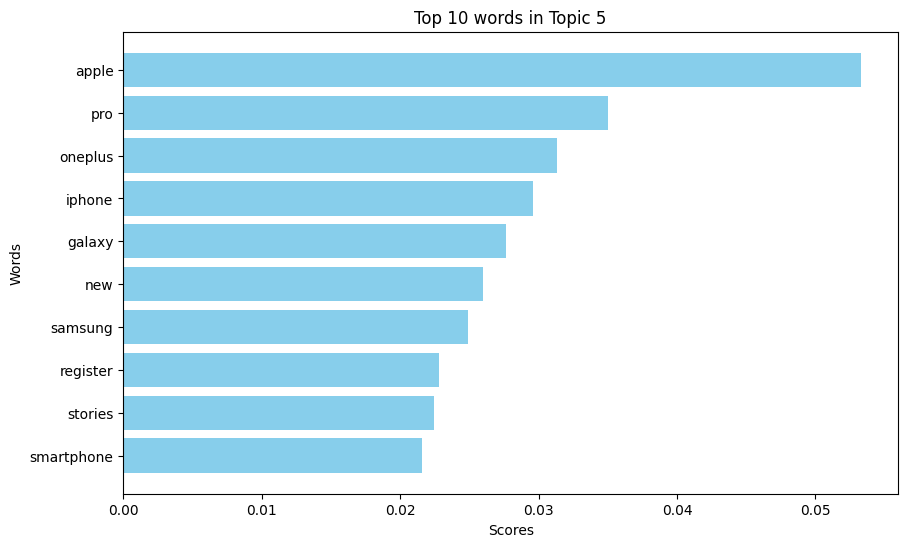

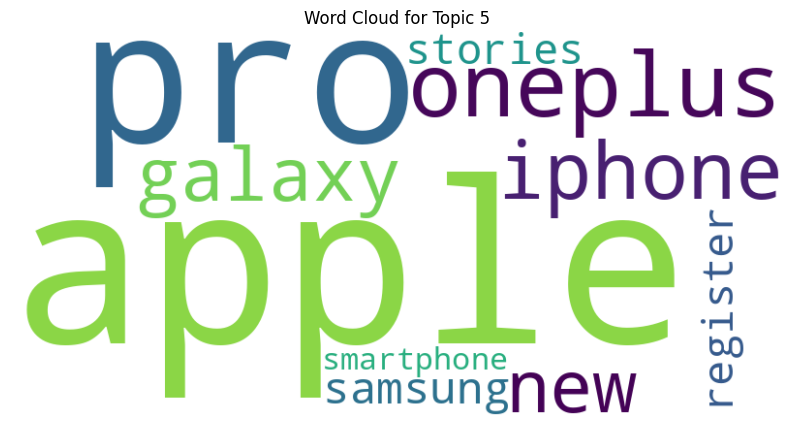

In [34]:
# Visualizing top 10 words for a particular topic, e.g., topic 0
topic_number = 5
top_n_words = 10

# Get the words and their scores for the selected topic
topic_words = topic_model.get_topic(topic_number)[:top_n_words]

# Extract words and their scores
words = [word for word, _ in topic_words]
scores = [score for _, score in topic_words]

# Plotting the top words
plt.figure(figsize=(10, 6))
plt.barh(words, scores, color='skyblue')
plt.xlabel('Scores')
plt.ylabel('Words')
plt.title(f'Top {top_n_words} words in Topic {topic_number}')
plt.gca().invert_yaxis()
plt.show()

# Generate and display a word cloud for the selected topic
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(topic_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Topic {topic_number}')
plt.show()